# Tutorial 1: Part 3

Objectives:
- Building a circular machine: introduce dipoles to the FODO cell.
- Use the matching MAD-X engine compute the require magnet strength for a desired tune. 

**Adding dipoles in the FODO cell**

1. Consider now the cell of Tutorial 1 - Part 2 and add 4 sector dipoles of 15 m (asume 5 m of drift space between the magnets). Consider  ring with 736 dipoles with equal bending angles. Install the four dipoles in the FODO cell.

        Define the dipole parameters:
        BM: dipole, L=??, angle:=??;
    
        Add the dipole in the sequence: 
        dipole1: BM, at=??;


2. Do the dipoles (weak focusing) affect the $\beta_{max}$ and the dispersion? Compute the relative variation with and without dipoles on the $\beta_{max}$ on the two planes.


3. From the phase advance of the FODO cell compute the horizontal and vertical tune of the machine?

**From the FODO phase advance to the machine tune**

4. Supose you want to set a tune (60.2, 67.2), use the MAD-X matching routine on a single FODO to get it. 
     
        MATCH, SEQUENCE=??;
        GLOBAL, Q1=??;//H-tune
        GLOBAL, Q2=??;//V-tune
        VARY, NAME= ??, STEP=0.00001;
        VARY, NAME= ??, STEP=0.00001;
        LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
        ENDMATCH;
        
**BONUS:**

5. Change the beam to $E_{tot}= 3.5 TeV$. What is the new tune of the machine? Why?

6. What is the maximum tune that you can reach with such a lattice? (HINT: what is the maximum phase advance per FODO cell in the thin lense approximation...).

<div>
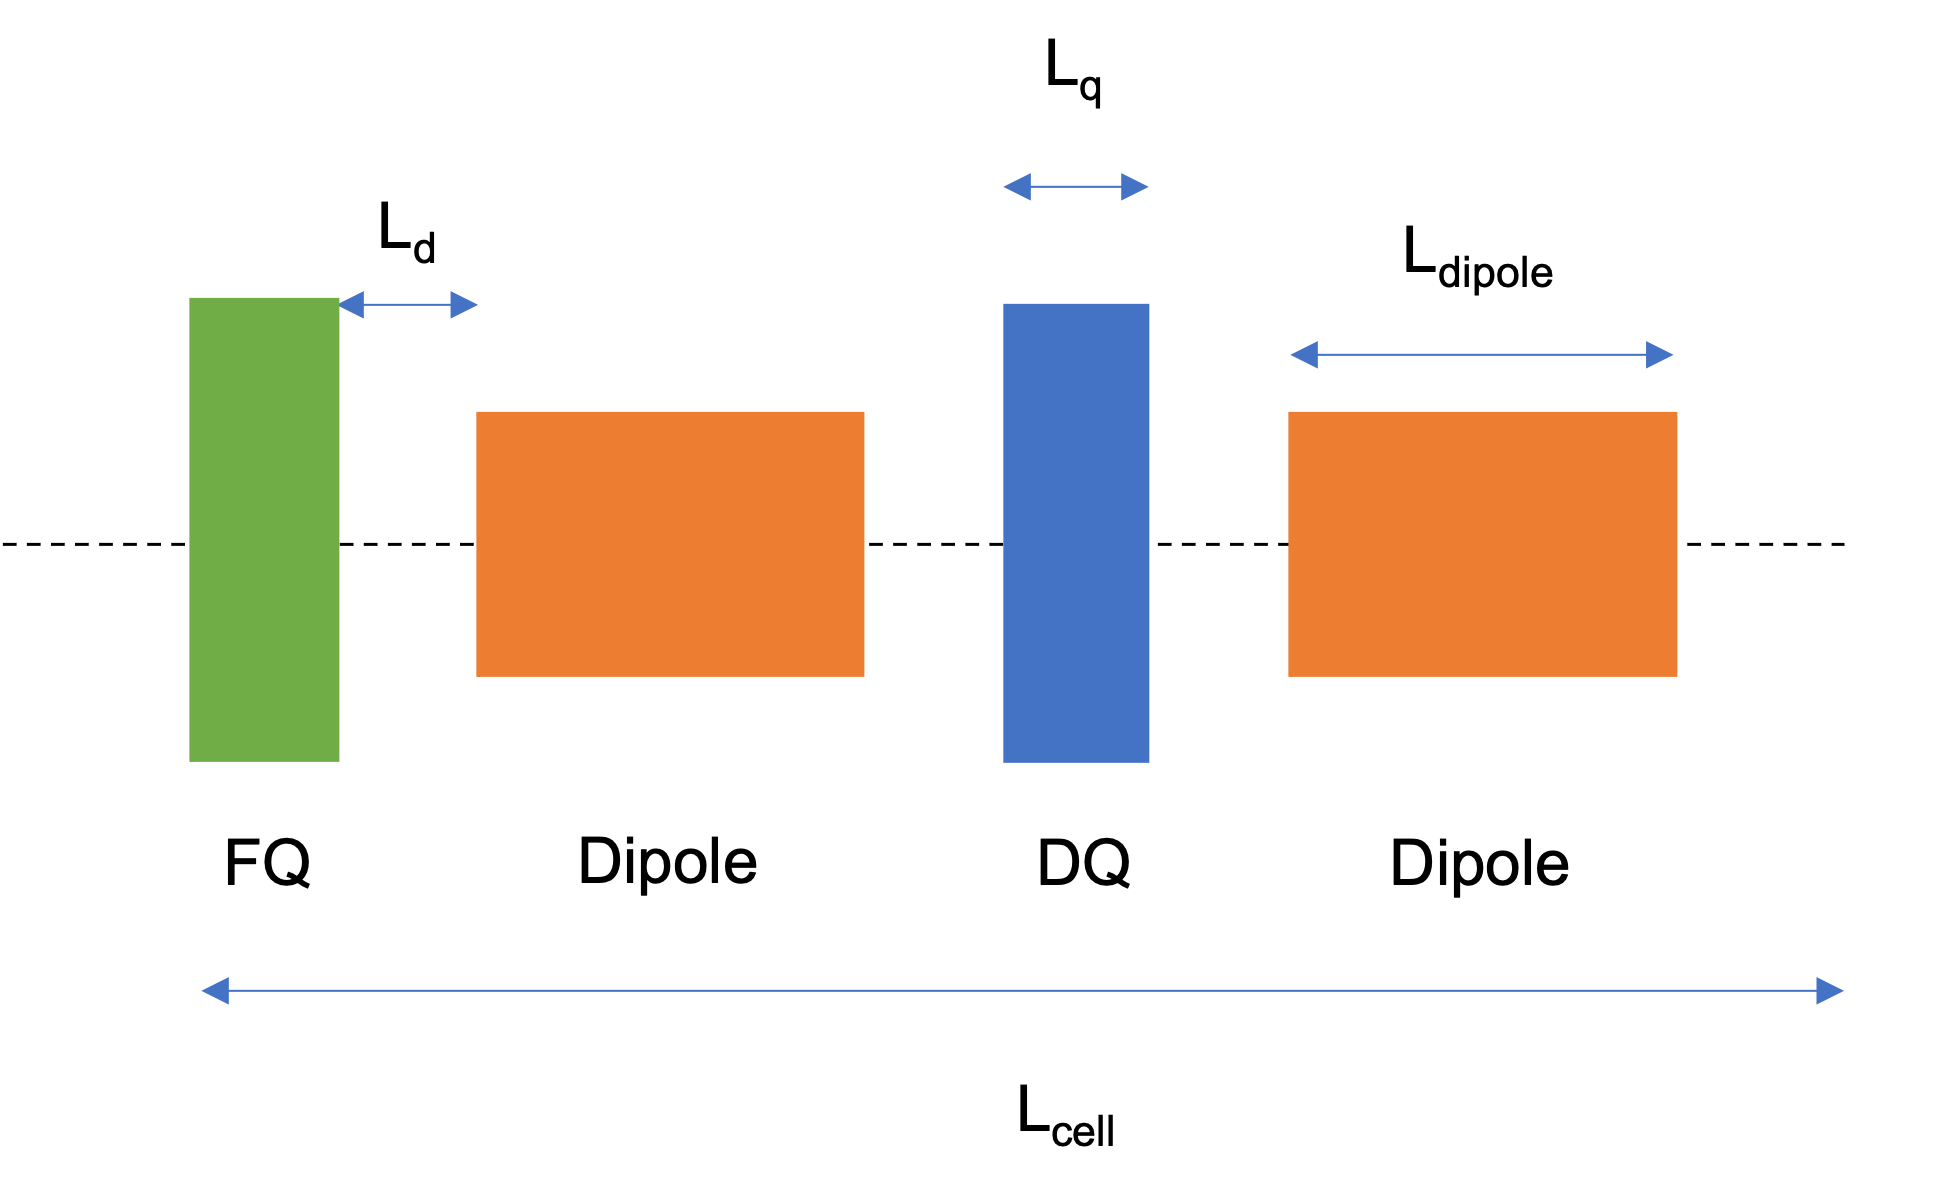
</div>

<div>
<img src="attachment:test.png" width="500"/>
</div>

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from cpymad.madx import Madx 

In [2]:
myMad = Madx(stdout=True)

1. Consider now the cell of Tutorial 1 - Part 2 and add 4 sector dipoles of 15 m (asume 5 m of drift space between the magnets). Consider a ring with 736 dipoles with equal bending angles. Install the four dipoles in the FODO cell.

First, the calculation of the required bending angle for a circular orbit is required:

$2*\pi=N\theta$

In [ ]:
# You can copy an paste the FODO script from Tutorial 1 - Part 2 and add the dipoles
myString='''
! *********************************************************************
! Definition of parameters
! *********************************************************************

l_cell=??;
quadrupoleLenght=??;
myK:=??;// m^-2

! *********************************************************************
! Definition of magnets
! ********************************************************************* 
QF: quadrupole, L=??, K1=??;
QD: quadrupole, L=??, K1=??;

! *********************************************************************
! Definition of sequence
! *********************************************************************

mycell:sequence, refer=entry, L=??;
q1: QF, at=??;
q2: QD, at=??;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=??, energy=??;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=??;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, file=MyfirstFODO.madx;

! In case you want to generate the MAD-X plot
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="test",file=MyfirstFODO;

'''
myMad.input(myString);

In [7]:
#Saving the content of the TWISS and SUMM table in two panda dataframes names as first_twiss and first_summary
first_twiss=myMad.table['first_twiss'].dframe()
first_summary=myMad.table['summ'].dframe()

In [ ]:
#Selecting some columns from the TWISS table
first_twiss[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

2. Do the dipoles (weak focusing) affect the 𝛽𝑚𝑎𝑥 and the dispersion? Compute the relative variation on the 𝛽𝑚𝑎𝑥 on the two planes.

In [ ]:
# Twiss without the contribution from the dipoles
myString='''
myAngle=0;
twiss, table=second_twiss; !Saving the twiss results in a table with a different name.
'''
myMad.input(myString);

In [11]:
#Saving the content of the TWISS and SUMM table in two panda dataframes names as second_twiss and second_summary
second_twiss=myMad.table['second_twiss'].dframe()
second_summary=myMad.table['summ'].dframe()

In [ ]:
#Selecting some columns from the TWISS table
second_twiss[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

3. From the phase advance of the FODO cell compute the horizontal and vertical tune of the machine?

In [4]:
# Number of FODO cells?


In [14]:
#Saving the content of the TWISS and SUMM table in two panda dataframes names as third_twiss 
third_twiss=myMad.table['twiss'].dframe()
third_summary=myMad.table['summ'].dframe()

In [ ]:
third_twiss[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

In [5]:
# Machine tunes?

# Tunes and phase

4. Supose you want to set a tune (60.2, 67.2), use the MAD-X matching routine on a single FODO to get it. 
     
        MATCH, SEQUENCE=??;
        GLOBAL, Q1=??;//H-tune
        GLOBAL, Q2=??;//V-tune
        VARY, NAME= ??, STEP=0.00001;
        VARY, NAME= ??, STEP=0.00001;
        LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
        ENDMATCH;



In [6]:
#Remeber that we have computed the total number of cells in the machine.


In [7]:
#What is the phase advance per cell that we want to match to?

In [21]:
#Copy and paste the previous MAD-X string and add the matching block.

**BONUS**

5. Change the beam to $E_{tot}= 3.5 TeV$. What is the new tune of the machine? Why?

In [ ]:
# Copy and paste the previous MAD-X string and modify the energy.

6. What is the maximum tune that you can reach with such a lattice? (HINT: what is the maximum phase advance per FODO cell in the thin lense approximation...)

In [8]:
#Max. tune of the mchine in units of 2*pi?
